In [100]:
import pandas as pd
import numpy as np
from plotnine import *
from tensorflow import keras
from keras import models
from keras import layers
from keras import losses
from tensorflow.keras import optimizers
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score #model evaluation



In [101]:
db=pd.read_csv("games.csv")
#db.head()


db["winner"] = db["winner"].astype('category')
db['winner_code']=db["winner"].cat.codes

db["opening_eco"]=db["opening_eco"].astype('category')
db["opening_eco_code"]=db["opening_eco"].cat.codes

db["opening_name"]=db["opening_name"].astype('category')
db["opening_name_code"]=db["opening_name"].cat.codes

db["victory_status"]=db["victory_status"].astype('category')
db["victory_status_code"]=db["victory_status"].cat.codes

db["increment_code"]=db["increment_code"].astype('category')
db["increment_code_num"]=db["increment_code"].cat.codes

In [102]:
ELOconditionsW = [
    (db['white_rating'] >= 0) & (db['white_rating'] <= 1450),
    (db['white_rating'] >= 1451) & (db['white_rating'] <= 1700),
    (db['white_rating'] >= 1701)
    ]

ELOconditionsB = [
    (db['black_rating'] >= 0) & (db['black_rating'] <= 1450),
    (db['black_rating'] >= 1451) & (db['black_rating'] <= 1700),
    (db['black_rating'] >= 1701)
    ]

values = ['0', '1', '2']

db['tierW'] = np.select(ELOconditionsW, values)
db['tierB'] = np.select(ELOconditionsB, values)

db['tierW'] = db['tierW'].astype(str).astype('category')
db['tierWcode'] = db['tierW'].cat.codes
db['tierB'] = db['tierB'].astype(str).astype('category')
db['tierBcode'] = db['tierB'].cat.codes




#db[['black_rating','white_rating','tierB','tierW','winner']].iloc[0:25]

counter =0
for i in db['tierW']:
    if i == '2':
        counter +=1
        
print(counter)

6905


In [116]:
db.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_ply,winner_code,opening_eco_code,opening_name_code,victory_status_code,increment_code_num,tierW,tierB,tierWcode,tierBcode
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,5,2,248,1387,2,110,1,0,1,0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,4,0,71,750,3,298,0,0,0,0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,3,2,171,650,1,298,1,1,1,1
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,...,3,2,241,992,1,187,0,1,0,1
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,...,5,2,192,783,1,247,1,1,1,1


In [104]:
predictors=["opening_eco_code","turns"]

X_train, X_test, y_train, y_test = train_test_split(db[predictors], db["tierWcode"], test_size=0.2)


zscore = StandardScaler()
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

myLogit = LogisticRegression(penalty = "none") # create

myLogit.fit(Xz_train, y_train) #fit

predictedVals = myLogit.predict(Xz_test)# predict



In [105]:
accuracy_score(y_test,predictedVals)

0.3778664007976072

/Users/matthew/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


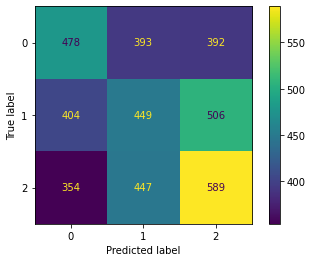

In [106]:
plot_confusion_matrix(myLogit, Xz_test, y_test)

In [107]:
predictors=["white_rating","opening_eco_code","black_rating","rated"]
X = db[predictors]
Y = db["turns"]

In [108]:
zScore = StandardScaler()
zScore.fit(X)

Xz = zScore.transform(X)

In [109]:
LR_Model1 = LinearRegression()

In [110]:
LR_Model1.fit(Xz, Y)

LinearRegression()

In [111]:
turn_pred = LR_Model1.predict(Xz)

turn_pred[1:10]

array([54.98485344, 60.29391915, 59.90548474, 60.16981872, 43.72405556,
       59.88312168, 60.57102579, 58.65747181, 54.559722  ])

In [112]:
mean_squared_error(Y, price_pred)

1087.5010117572097

In [113]:
r2_score(Y, price_pred)

0.03498623120915423

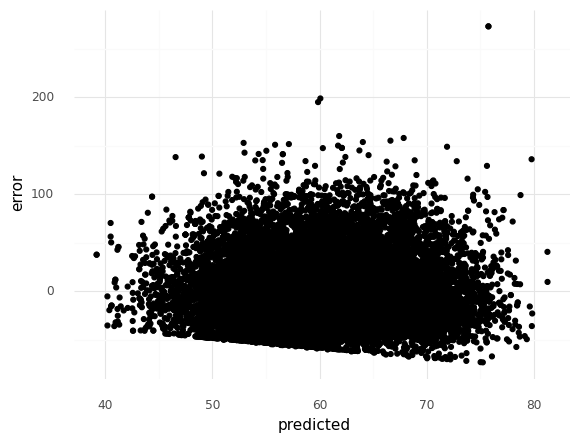

<ggplot: (356873069)>

In [114]:
assump = pd.DataFrame({"error":Y - turn_pred, "predicted": turn_pred})

(ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_minimal())

In [118]:
coefficients = pd.DataFrame({"Coef":LR_Model1.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model1.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients

/var/folders/01/zrl41sc1325ccgdyth45q5z80000gn/T/ipykernel_97610/1370986850.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Coef,Name
0,1.609720,white_rating
1,0.730047,opening_eco_code
2,4.252257,black_rating
3,2.886926,rated
4,60.465999,intercept


In [ ]:
#Next Linear Reg

In [129]:
predictors=["turns","opening_eco_code","black_rating"]
X = db[predictors]
Y = db["white_rating"]

In [130]:
zScore = StandardScaler()
zScore.fit(X)

Xz = zScore.transform(X)

In [131]:
LR_Model2 = LinearRegression()

In [132]:
LR_Model2.fit(Xz, Y)

LinearRegression()

In [133]:
elo_pred = LR_Model2.predict(Xz)

elo_pred[1:10]

array([1370.88553363, 1544.75930326, 1524.67324886, 1536.10427927,
       1208.43668808, 1498.16804203, 1902.1264587 , 1481.80695573,
       1363.11372858])

In [138]:
mean_squared_error(Y, elo_pred)

50525.61056544815

In [139]:
r2_score(Y, elo_pred)

0.4043498061945283

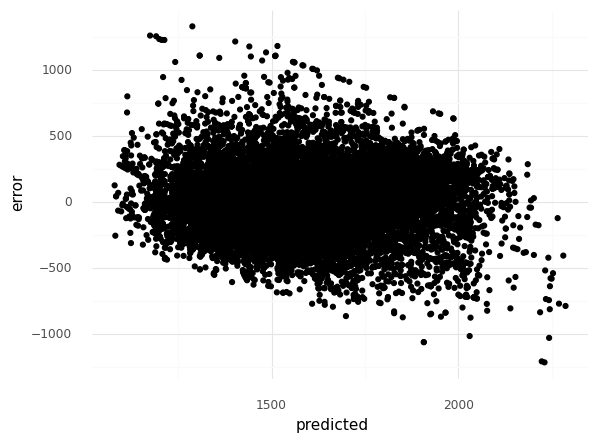

<ggplot: (360229846)>

In [140]:
assump = pd.DataFrame({"error":Y - elo_pred, "predicted": elo_pred})

(ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_minimal())

In [141]:
coefficients = pd.DataFrame({"Coef":LR_Model2.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model2.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients

/var/folders/01/zrl41sc1325ccgdyth45q5z80000gn/T/ipykernel_97610/2864364317.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Coef,Name
0,8.089260,turns
1,10.799674,opening_eco_code
2,183.113753,black_rating
3,1596.631868,intercept


In [51]:
'''
db.head(50)
counter =0
for i in db['tierW']:
    if i == '3':
        counter +=1
        
print(counter)


db["winner"] = db["winner"].astype('category')
db['winner_code']=db["winner"].cat.codes

db["opening_eco"]=db["opening_eco"].astype('category')
db["opening_eco_code"]=db["opening_eco"].cat.codes

db["opening_name"]=db["opening_name"].astype('category')
db["opening_name_code"]=db["opening_name"].cat.codes

db["victory_status"]=db["victory_status"].astype('category')
db["victory_status_code"]=db["victory_status"].cat.codes

db["increment_code"]=db["increment_code"].astype('category')
db["increment_code_num"]=db["increment_code"].cat.codes


data.speeding.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()


#X=db[predictors].values.to_list()

#y=db["tierW"].values.to_list()

#db = pd.DataFrame(db)

#db = np.asarray(db["tierW"]).astype('float32')
#db = np.asarray(db["tierB"]).astype('float32')


predictors=["opening_eco_code","turns"]
#predictors=["turns", "opening_ply"]
db.shape
db.dtypes


x_train, x_test, y_train, y_test =train_test_split(db[predictors], db["tierWcode"], test_size=.2)
x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

len(x_train)

x_val=x_train[:1500]
partial_x_train = x_train[1500:]
y_val=y_train[:1500]
partial_y_train = y_train[1500: ]

model=models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape=(2,)))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#categorical cross entropy
#output layer give threee layers
#sigmoid to softmax


[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

'''